In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
import sys
from pycocotools.coco import COCO
import urllib
import zipfile

# Downloading datasets and unzip them

In [3]:
RDD2022Czech_url = 'https://bigdatacup.s3.ap-northeast-1.amazonaws.com/2022/CRDDC2022/RDD2022/Country_Specific_Data_CRDDC2022/RDD2022_Czech.zip'
urllib.request.urlretrieve(RDD2022Czech_url , filename = 'Czech.zip' )

('Czech.zip', <http.client.HTTPMessage at 0x7abb1404ff70>)

In [4]:

RDD2022India_url = 'https://bigdatacup.s3.ap-northeast-1.amazonaws.com/2022/CRDDC2022/RDD2022/Country_Specific_Data_CRDDC2022/RDD2022_India.zip'
urllib.request.urlretrieve(RDD2022India_url , filename = 'India.zip' )

('India.zip', <http.client.HTTPMessage at 0x7abb4288cb20>)

In [5]:
RDD2022Japan_url = 'https://bigdatacup.s3.ap-northeast-1.amazonaws.com/2022/CRDDC2022/RDD2022/Country_Specific_Data_CRDDC2022/RDD2022_Japan.zip'
urllib.request.urlretrieve(RDD2022Japan_url , filename = 'Japan.zip' )

('Japan.zip', <http.client.HTTPMessage at 0x7abb13e9c070>)

In [6]:
!unzip Czech.zip

Streaming output truncated to the last 5000 lines.
  inflating: Czech/train/annotations/xmls/Czech_000826.xml  
  inflating: Czech/train/annotations/xmls/Czech_000827.xml  
  inflating: Czech/train/annotations/xmls/Czech_000829.xml  
  inflating: Czech/train/annotations/xmls/Czech_000830.xml  
  inflating: Czech/train/annotations/xmls/Czech_000831.xml  
  inflating: Czech/train/annotations/xmls/Czech_000832.xml  
  inflating: Czech/train/annotations/xmls/Czech_000836.xml  
  inflating: Czech/train/annotations/xmls/Czech_000838.xml  
  inflating: Czech/train/annotations/xmls/Czech_000839.xml  
  inflating: Czech/train/annotations/xmls/Czech_000841.xml  
  inflating: Czech/train/annotations/xmls/Czech_000842.xml  
  inflating: Czech/train/annotations/xmls/Czech_000843.xml  
  inflating: Czech/train/annotations/xmls/Czech_000844.xml  
  inflating: Czech/train/annotations/xmls/Czech_000845.xml  
  inflating: Czech/train/annotations/xmls/Czech_000846.xml  
  inflating: Czech/train/annotatio

In [7]:
!unzip India.zip

Streaming output truncated to the last 5000 lines.
  inflating: India/train/images/India_003469.jpg  
  inflating: India/train/images/India_003471.jpg  
  inflating: India/train/images/India_003472.jpg  
  inflating: India/train/images/India_003473.jpg  
  inflating: India/train/images/India_003475.jpg  
  inflating: India/train/images/India_003478.jpg  
  inflating: India/train/images/India_003479.jpg  
  inflating: India/train/images/India_003480.jpg  
  inflating: India/train/images/India_003481.jpg  
  inflating: India/train/images/India_003482.jpg  
  inflating: India/train/images/India_003483.jpg  
  inflating: India/train/images/India_003485.jpg  
  inflating: India/train/images/India_003486.jpg  
  inflating: India/train/images/India_003488.jpg  
  inflating: India/train/images/India_003489.jpg  
  inflating: India/train/images/India_003490.jpg  
  inflating: India/train/images/India_003491.jpg  
  inflating: India/train/images/India_003493.jpg  
  inflating: India/train/images

In [8]:
!unzip Japan.zip

Streaming output truncated to the last 5000 lines.
  inflating: Japan/train/images/Japan_006896.jpg  
  inflating: Japan/train/images/Japan_006897.jpg  
  inflating: Japan/train/images/Japan_006898.jpg  
  inflating: Japan/train/images/Japan_006899.jpg  
  inflating: Japan/train/images/Japan_006900.jpg  
  inflating: Japan/train/images/Japan_006901.jpg  
  inflating: Japan/train/images/Japan_006903.jpg  
  inflating: Japan/train/images/Japan_006904.jpg  
  inflating: Japan/train/images/Japan_006905.jpg  
  inflating: Japan/train/images/Japan_006908.jpg  
  inflating: Japan/train/images/Japan_006909.jpg  
  inflating: Japan/train/images/Japan_006910.jpg  
  inflating: Japan/train/images/Japan_006911.jpg  
  inflating: Japan/train/images/Japan_006912.jpg  
  inflating: Japan/train/images/Japan_006915.jpg  
  inflating: Japan/train/images/Japan_006916.jpg  
  inflating: Japan/train/images/Japan_006917.jpg  
  inflating: Japan/train/images/Japan_006918.jpg  
  inflating: Japan/train/images

# Move all data into single folder

In [9]:
import os
import shutil

# Define the source and destination paths
source_folders = ['India', 'Japan', 'Czech']
destination_data_folder = 'data'
destination_label_folder = 'annotations'

# Create necessary folders
os.makedirs(destination_data_folder, exist_ok=True)
os.makedirs(destination_label_folder, exist_ok=True)

# Copy train images and annotations (xmls) to the respective folders
for folder in source_folders:
    train_images_path = os.path.join(folder, 'train', 'images')
    train_annotations_path = os.path.join(folder, 'train', 'annotations', 'xmls')

    # Copy train images
    for filename in os.listdir(train_images_path):
        shutil.copy(os.path.join(train_images_path, filename), destination_data_folder)

    # Copy annotations
    for filename in os.listdir(train_annotations_path):
        shutil.copy(os.path.join(train_annotations_path, filename), destination_label_folder)


In [10]:
!ls -l data | wc -l
!ls -l annotations | wc -l

21042
21042


# Extracting useful data

In [11]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET


def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            bbx = member.find('bndbox')
            xmin = int(bbx.find('xmin').text)
            ymin = int(bbx.find('ymin').text)
            xmax = int(bbx.find('xmax').text)
            ymax = int(bbx.find('ymax').text)
            label = member.find('name').text

            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     label,
                     xmin,
                     ymin,
                     xmax,
                     ymax
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height',
                   'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df


def main():

    image_path = os.path.join(os.getcwd(), 'annotations')
    xml_df = xml_to_csv(image_path)
    xml_df.to_csv('labels.csv', index=None)
    print('Successfully converted xml to csv.')


main()

Successfully converted xml to csv.


In [12]:
file_path = 'labels.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

print(df['width'].value_counts())
print(df['height'].value_counts())

           filename  width  height class  xmin  ymin  xmax  ymax
0  Japan_007049.jpg    600     600   D50   372   379   419   392
1  Japan_004279.jpg    600     600   D20   156   402   600   558
2  Japan_002724.jpg    600     600   D00   386   324   459   353
3  Japan_002724.jpg    600     600   D44   350   335   563   507
4  Japan_002724.jpg    600     600   D10    87   342   265   376
600     23526
720      7996
3        2498
540       316
1024      277
1080       89
Name: width, dtype: int64
600     25817
720      8203
540       316
1024      277
1080       89
Name: height, dtype: int64


(34702, 8)


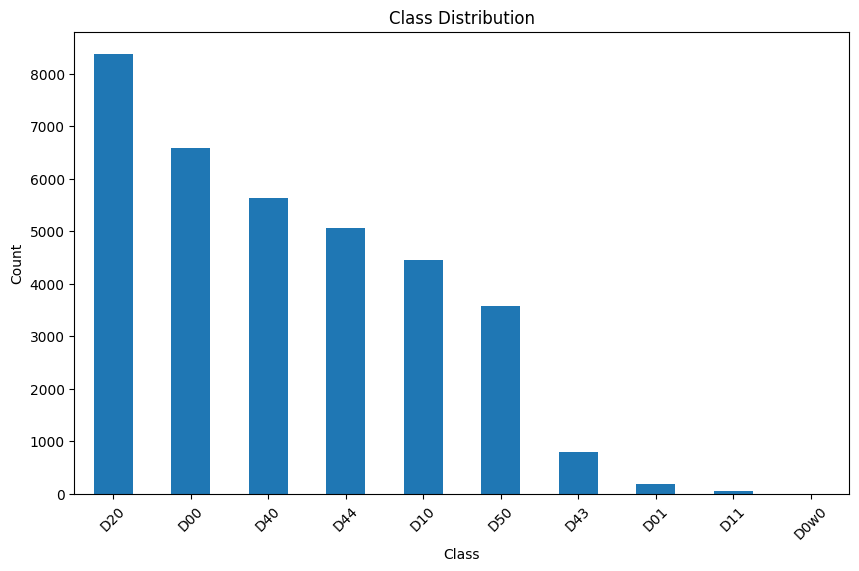

In [13]:
# Calculate class distribution
class_distribution = df['class'].value_counts()

print(df.shape)
# Plot class distribution
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [14]:
uniqueFiles = df['filename'].unique()
print(uniqueFiles.shape)

(14569,)


# Removing unwanted data

In [15]:
# List of classes to exclude
exclude_classes = ['D43', 'D01', 'D11', 'D0w0']

# Filter out rows with excluded classes
new_df = df[~df['class'].isin(exclude_classes)]
print(new_df.shape)

print(new_df['class'].value_counts())

(33684, 8)
D20    8381
D00    6592
D40    5627
D44    5057
D10    4446
D50    3581
Name: class, dtype: int64


In [16]:
import shutil

# Source folder path
source_folder = 'data/'  # Change this to the path of your source folder

# Destination folder path
destination_folder = 'new_data/'  # Change this to the path of your destination folder

# Copy the folder
shutil.copytree(source_folder, destination_folder)


'new_data/'

In [17]:
uniqueFiles = new_df['filename'].unique()
print(uniqueFiles.shape)
print(new_df['filename'].shape)

(14209,)
(33684,)


# Keeping img of size 600x600 and 720x720

In [18]:
filtered_df1 = new_df[(new_df['height'].isin([600])) & (new_df['width'].isin([600]))]
filtered_df2 = new_df[(new_df['height'].isin([720])) & (new_df['width'].isin([720]))]

print(filtered_df1.shape)
print(filtered_df2.shape)

filtered_df = pd.concat([filtered_df1, filtered_df2], ignore_index=True)
print(filtered_df.shape)

print(filtered_df['filename'].unique().shape)

(22795, 8)
(7714, 8)
(30509, 8)
(12340,)


# Deleting unwanted files from data and annotations folder

In [19]:
import os

# Directory containing the files
directory = 'data'


# List of filenames to retain
filenames_to_retain = filtered_df['filename'].unique() # Add the filenames you want to retain

# Iterate through files in the directory
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    if filename not in filenames_to_retain:
        # Delete the file if its name is not in the list of filenames to retain
        os.remove(filepath)



In [20]:
# Initialize a counter
file_count = 0

# Iterate through files in the directory
for filename in os.listdir(directory):
    # Check if the path is a file (not a directory)
    if os.path.isfile(os.path.join(directory, filename)):
        # Increment the counter
        file_count += 1

# Print the count of files
print(file_count)


12340


In [21]:
import os

# Directory containing the files
directory = 'annotations'

print(filtered_df['filename'].unique())

# List of filenames to retain
filenames_to_retain = filtered_df['filename'].str.replace('.jpg', '.xml').unique() # Add the filenames you want to retain
print(filenames_to_retain)

# Iterate through files in the directory
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    if filename not in filenames_to_retain:
        # Delete the file if its name is not in the list of filenames to retain
        os.remove(filepath)

['Japan_007049.jpg' 'Japan_004279.jpg' 'Japan_002724.jpg' ...
 'India_006775.jpg' 'India_007431.jpg' 'India_002098.jpg']
['Japan_007049.xml' 'Japan_004279.xml' 'Japan_002724.xml' ...
 'India_006775.xml' 'India_007431.xml' 'India_002098.xml']


<ipython-input-21-84b62290bd83>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  filenames_to_retain = filtered_df['filename'].str.replace('.jpg', '.xml').unique() # Add the filenames you want to retain


In [22]:
# Initialize a counter
file_count = 0

directory = 'annotations'

# Iterate through files in the directory
for filename in os.listdir(directory):
    # Check if the path is a file (not a directory)
    if os.path.isfile(os.path.join(directory, filename)):
        # Increment the counter
        file_count += 1

# Print the count of files
print(file_count)


12340


In [23]:
# Define paths
labels_folder_path = 'labels'

# Create labels folder if it doesn't exist
os.makedirs(labels_folder_path, exist_ok=True)

# Read CSV file
df = filtered_df

# Group data by filename
grouped = df.groupby('filename')

class_label = {
    "D00": 0,
    "D10": 1,
    "D20": 2,
    "D40": 3,
    "D44": 4,
    "D50": 5,
}
count_bb = 0

# Process each group
for filename, group in grouped:
    # Open a text file with the same name as the image
    with open(os.path.join(labels_folder_path, filename.replace('.jpg', '.txt')), 'w') as f:
        # Iterate over rows in the group

        for index, row in group.iterrows():
            # if filename == 'India_000088.jpg':
            #   print(row['xmin'], row['xmax'], row['width'])
            count_bb += 1
            # Calculate object-class, x_center, y_center, width, and height
            x_center = (row['xmin'] + row['xmax']) / (2 * row['width'])
            y_center = (row['ymin'] + row['ymax']) / (2 * row['width'])
            width = (row['xmax'] - row['xmin']) / row['width']
            height = (row['ymax'] - row['ymin']) / row['width']
            obj_class = class_label[(row['class'])]
            # Write to the text file
            f.write(f"{obj_class} {x_center} {y_center} {width} {height}\n")
print("Count BB = ", count_bb)
print("Conversion completed successfully.")


Count BB =  30509
Conversion completed successfully.


In [24]:
!ls -l data | wc -l
!ls -l labels | wc -l

12341
12341


In [25]:
import os
import shutil
import random

# Define paths
data_folder = "data"
labels_folder = "labels"
output_folder = "datasets"

# Create output directory and subdirectories
os.makedirs(output_folder, exist_ok=True)
os.makedirs(os.path.join(output_folder, 'train', 'images'), exist_ok=True)
os.makedirs(os.path.join(output_folder, 'train', 'labels'), exist_ok=True)
os.makedirs(os.path.join(output_folder, 'test', 'images'), exist_ok=True)
os.makedirs(os.path.join(output_folder, 'test', 'labels'), exist_ok=True)
os.makedirs(os.path.join(output_folder, 'valid', 'images'), exist_ok=True)
os.makedirs(os.path.join(output_folder, 'valid', 'labels'), exist_ok=True)

# List files in data folder
data_files = os.listdir(data_folder)
random.shuffle(data_files)

# Split data
num_files = len(data_files)
train_ratio = 0.85
test_ratio = 0.075
valid_ratio = 0.075

train_split = int(train_ratio * num_files)
test_split = int(test_ratio * num_files)

train_files = data_files[:train_split]
test_files = data_files[train_split:train_split + test_split]
valid_files = data_files[train_split + test_split:]

# Copy files to respective directories
def copy_files(files, src_folder, dest_folder):
    for file in files:
        shutil.copy(os.path.join(src_folder, file), os.path.join(dest_folder, 'images', file))
        shutil.copy(os.path.join(labels_folder, file.replace('.jpg', '.txt')), os.path.join(dest_folder, 'labels', file.replace('.jpg', '.txt')))

copy_files(train_files, data_folder, os.path.join(output_folder, 'train'))
copy_files(test_files, data_folder, os.path.join(output_folder, 'test'))
copy_files(valid_files, data_folder, os.path.join(output_folder, 'valid'))


In [26]:
!ls -l datasets/train/images | wc -l
!ls -l datasets/test/images | wc -l
!ls -l datasets/valid/images | wc -l

10490
926
927


In [27]:
import zipfile
import requests
import cv2
import matplotlib.pyplot as plt
import glob
import random
import os

In [28]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.5/719.5 kB 4.1 MB/s eta 0:00:00


Dataset YAML file

In [29]:
%%writefile RDD_v8.yaml
train: 'train/images'
val: 'valid/images'

# class names
names:
  0: 'Longitudinal'
  1: 'Lateral'
  2: 'Aligator'
  3: 'Pothole'
  4: 'White blur line'
  5: 'Other'

Writing RDD_v8.yaml


In [30]:
# Sample training for 5 epoch.
EPOCHS = 15

YOLOv8 Small Training

In [31]:
!yolo task=detect mode=train model=yolov8s.pt imgsz=640 data=RDD_v8.yaml epochs={EPOCHS} batch=8 name=yolov8s_v8_5e

100% 21.5M/21.5M [00:00<00:00, 170MB/s]
Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=RDD_v8.yaml, epochs=15, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8s_v8_5e, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

In [32]:
!zip -r runs.zip runs

  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/yolov8s_v8_5e/ (stored 0%)
  adding: runs/detect/yolov8s_v8_5e/val_batch0_pred.jpg (deflated 6%)
  adding: runs/detect/yolov8s_v8_5e/labels_correlogram.jpg (deflated 29%)
  adding: runs/detect/yolov8s_v8_5e/args.yaml (deflated 52%)
  adding: runs/detect/yolov8s_v8_5e/val_batch2_labels.jpg (deflated 6%)
  adding: runs/detect/yolov8s_v8_5e/val_batch0_labels.jpg (deflated 6%)
  adding: runs/detect/yolov8s_v8_5e/train_batch1.jpg (deflated 3%)
  adding: runs/detect/yolov8s_v8_5e/train_batch0.jpg (deflated 2%)
  adding: runs/detect/yolov8s_v8_5e/train_batch2.jpg (deflated 3%)
  adding: runs/detect/yolov8s_v8_5e/weights/ (stored 0%)
  adding: runs/detect/yolov8s_v8_5e/weights/best.pt (deflated 8%)
  adding: runs/detect/yolov8s_v8_5e/weights/last.pt (deflated 8%)
  adding: runs/detect/yolov8s_v8_5e/train_batch6561.jpg (deflated 7%)
  adding: runs/detect/yolov8s_v8_5e/confusion_matrix.png (deflated 22%)
  addin

# Evaluation on Validation images

In [33]:
!yolo task=detect mode=val model=runs/detect/yolov8s_v8_5e/weights/best.pt name=yolov8s_eval data=RDD_v8.yaml

Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/valid/labels.cache... 926 images, 0 backgrounds, 0 corrupt: 100% 926/926 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 58/58 [00:21<00:00,  2.64it/s]
                   all        926       2199      0.595       0.55      0.575      0.291
          Longitudinal        926        382      0.494      0.445      0.446      0.219
               Lateral        926        253      0.502      0.374      0.396      0.149
              Aligator        926        596      0.622      0.628      0.661       0.34
               Pothole        926        358      0.608      0.394      0.463      0.196
       White blur line        926        343      0.577      0.685       0.65      0.376
                 Other        926        267      

Inference on validation images

In [34]:
!yolo task=detect \
mode=predict \
model=runs/detect/yolov8s_v8_5e/weights/best.pt \
source=datasets/valid/images \
imgsz=640 \
name=yolov8s_v8_5e_infer640 \
hide_labels=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.299999999999999' in the future. Please use 'show_labels' instead.
Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

image 1/926 /content/datasets/valid/images/India_000061.jpg: 640x640 2 Potholes, 16.3ms
image 2/926 /content/datasets/valid/images/India_000168.jpg: 640x640 1 Pothole, 16.5ms
image 3/926 /content/datasets/valid/images/India_000191.jpg: 640x640 1 Aligator, 1 White blur line, 16.3ms
image 4/926 /content/datasets/valid/images/India_000200.jpg: 640x640 1 Aligator, 16.4ms
image 5/926 /content/datasets/valid/images/India_000283.jpg: 640x640 1 Aligator, 1 White blur line, 16.3ms
image 6/926 /content/datasets/valid/images/India_000298.jpg: 640x640 1 Aligator, 16.3ms
image 7/926 /content/datasets/valid/images/India_000350.jpg: 640x640 (no detections), 16.3ms
image 8/926 /content/datasets/

Visualize Validation Results




In [35]:
# Plot and visualize images in a 2x2 grid.
def visualize(result_dir, num_samples=4):
    """
    Function accepts a list of images and plots
    them in a 2x2 grid.
    """
    plt.figure(figsize=(20, 12))
    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    random.shuffle(image_names)
    for i, image_name in enumerate(image_names):
        image = plt.imread(image_name)
        plt.subplot(2, 2, i+1)
        plt.imshow(image)
        plt.axis('off')
        if i == num_samples-1:
            break
    plt.tight_layout()
    plt.show()

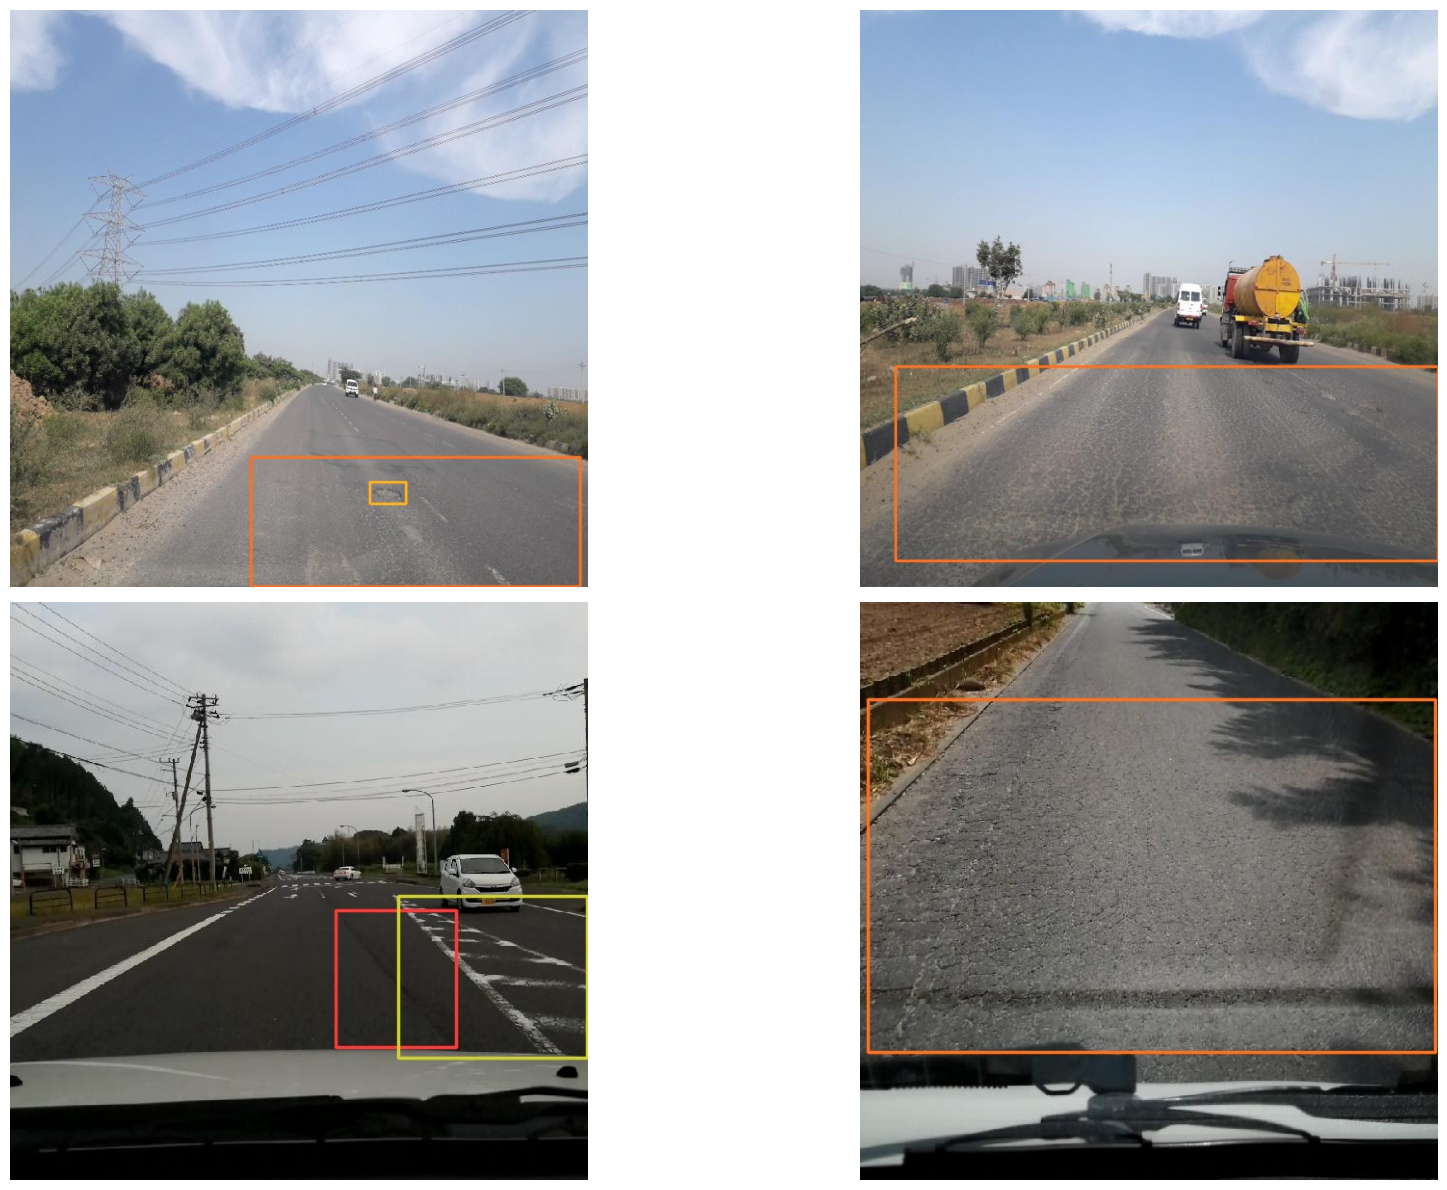

In [37]:
visualize('runs/detect/yolov8s_v8_5e_infer640/')

YOLOv8 Medium Training

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt imgsz=1440 data=RDD_v8.yaml epochs=20 batch=8 name=yolov8m_v8_50e

100% 49.7M/49.7M [00:00<00:00, 345MB/s]
Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=RDD_v8.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=1440, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8m_v8_50e, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

Evaluation on Validation images

In [ ]:
!yolo task=detect mode=val model=runs/detect/yolov8m_v8_50e/weights/best.pt name=yolov8m_eval data=RDD_v8.yaml imgsz=1440


Inference on Validation images

In [ ]:
!yolo task=detect \
mode=predict \
model=runs/detect/yolov8m_v8_50e/weights/best.pt \
source=datasets/valid/images \
imgsz=1440 \
name=yolov8m_v8_50e_infer1440 \
hide_labels=True

Visualize Validation Results



In [ ]:
# Plot and visualize images in a 2x2 grid.
def visualize(result_dir, num_samples=4):
    """
    Function accepts a list of images and plots
    them in a 2x2 grid.
    """
    plt.figure(figsize=(20, 12))
    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    random.shuffle(image_names)
    for i, image_name in enumerate(image_names):
        image = plt.imread(image_name)
        plt.subplot(2, 2, i+1)
        plt.imshow(image)
        plt.axis('off')
        if i == num_samples-1:
            break
    plt.tight_layout()
    plt.show()

In [ ]:
visualize('runs/detect/yolov8m_v8_50e_infer1440/')